In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.isnull().sum().sum()

0

In [6]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
df.describe().round(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.00,150.00,150.00,150.00,150.00
mean,75.50,5.84,3.05,3.76,1.20
std,43.45,0.83,0.43,1.76,0.76
min,1.00,4.30,2.00,1.00,0.10
25%,38.25,5.10,2.80,1.60,0.30
50%,75.50,5.80,3.00,4.35,1.30
75%,112.75,6.40,3.30,5.10,1.80
max,150.00,7.90,4.40,6.90,2.50


<function matplotlib.pyplot.show(close=None, block=None)>

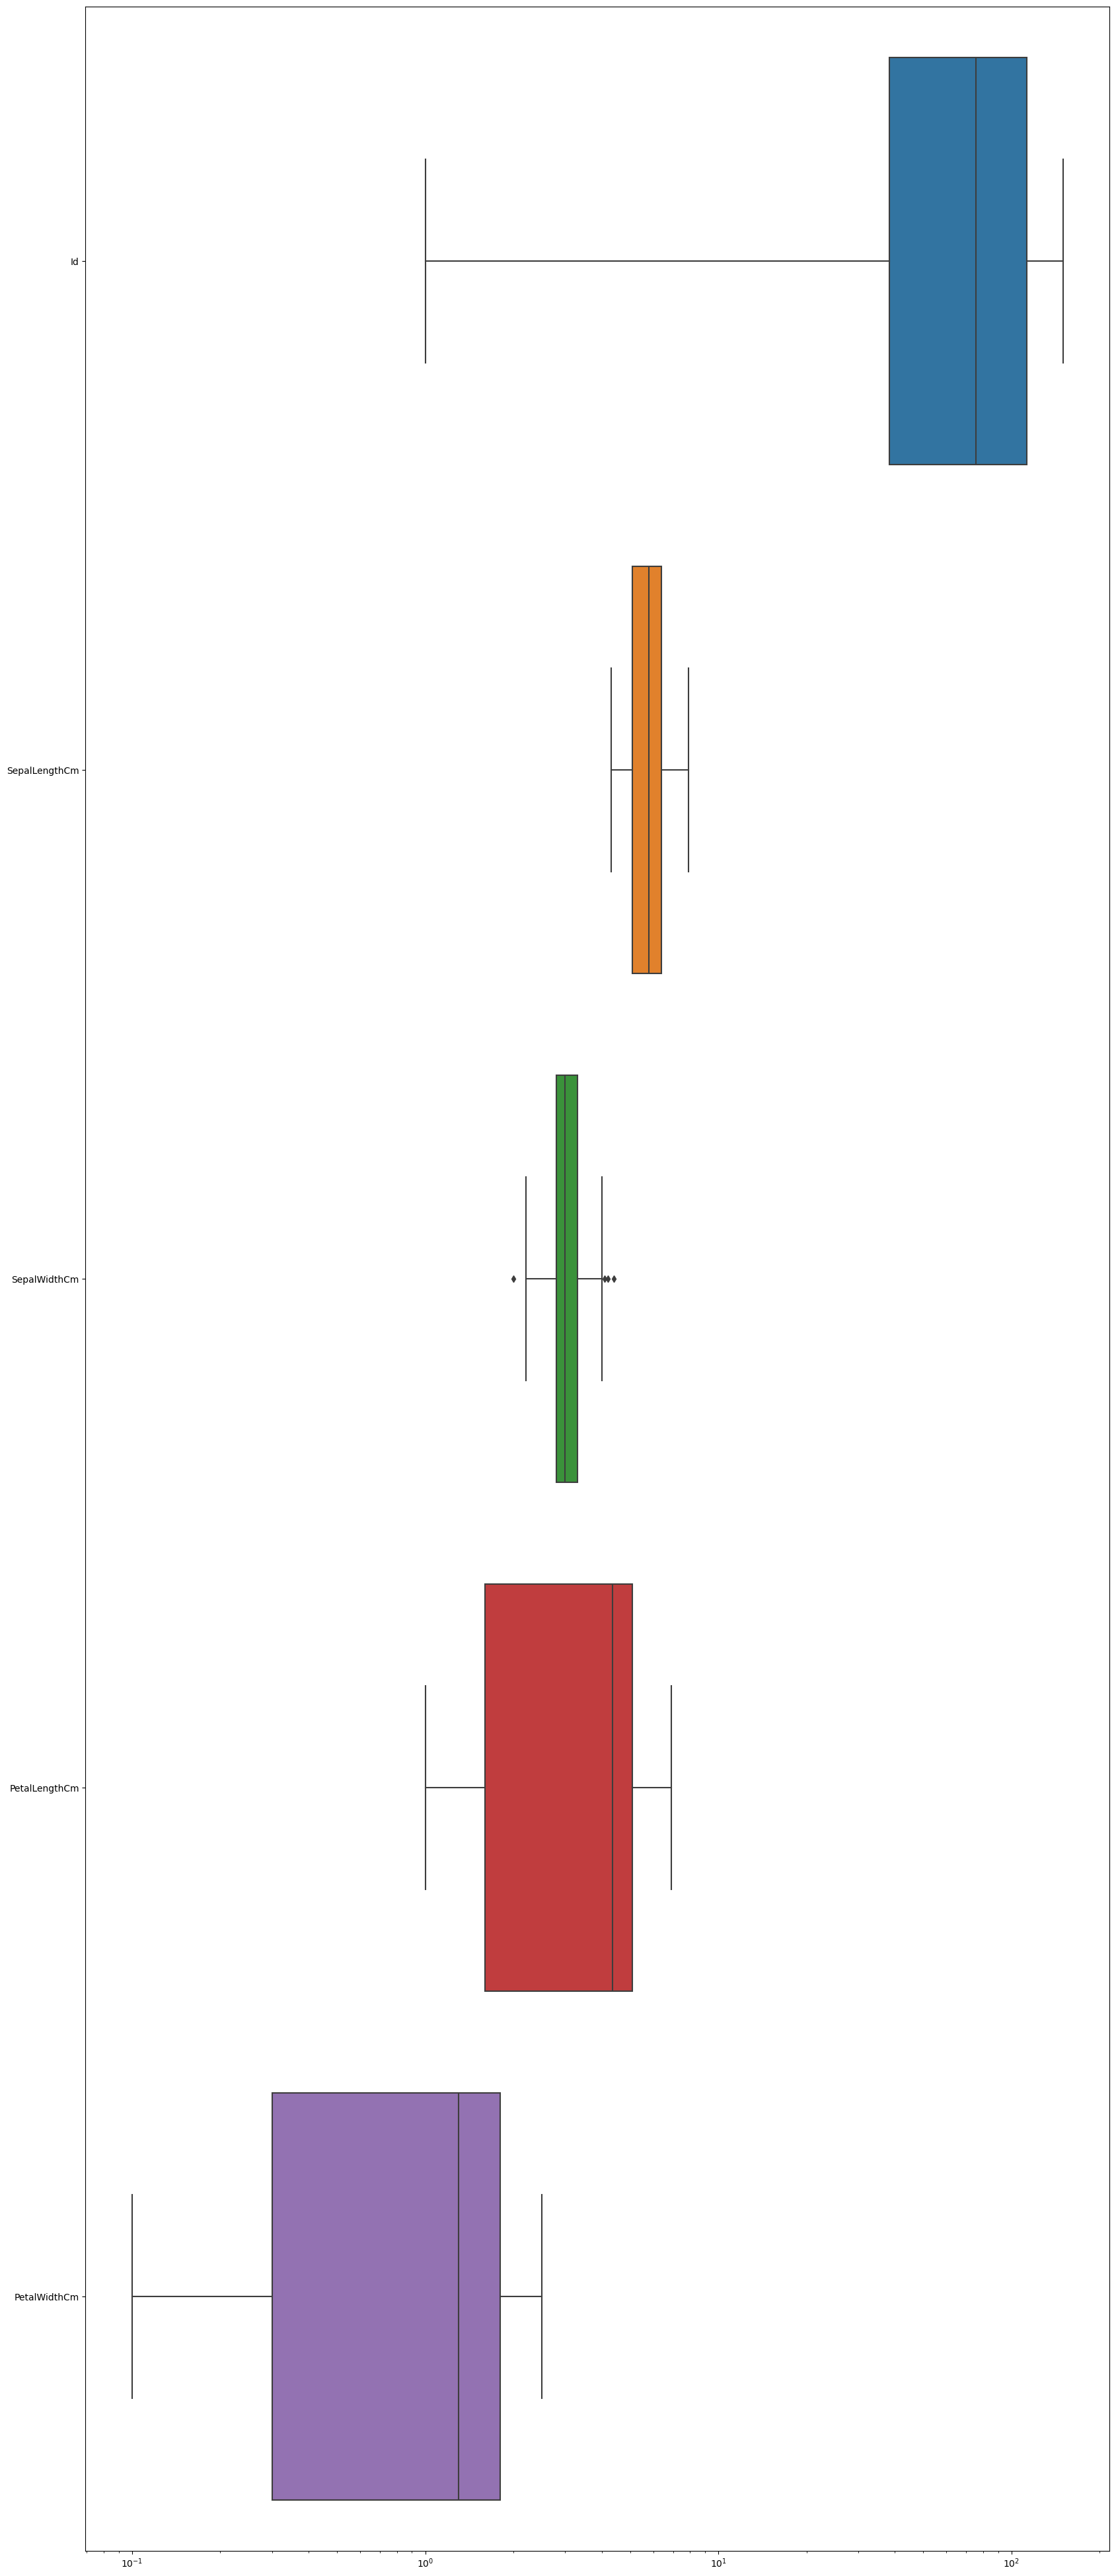

In [8]:
%matplotlib inline

plt.figure(figsize = (20,50))
ax = sns.boxplot(data = df, orient = "h")
ax.set(xscale = "log")
plt.show

In [9]:
features=df.columns[1:5]
df1=df[features]
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# K-Means

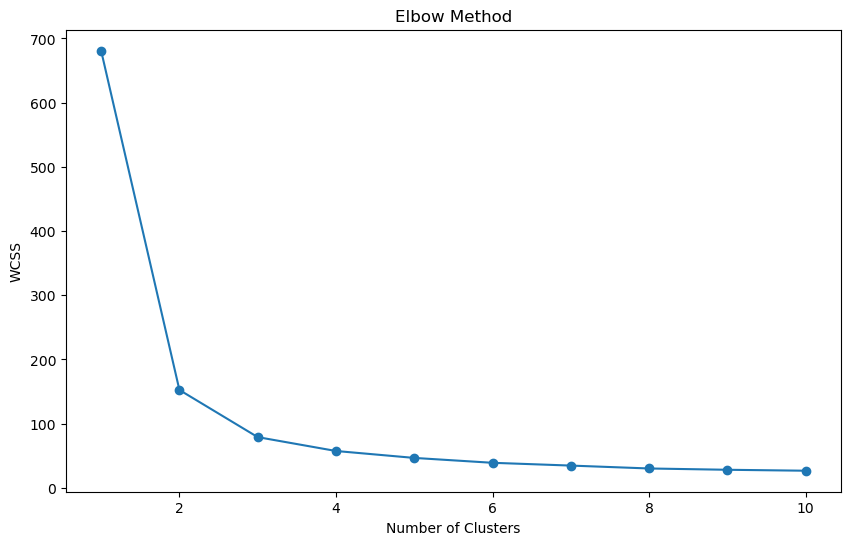

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method
# WCSS ( Within-cluster Sum of Squares) for different numbers of clusters
wcss=[]

# trying K-Means with clusters ranging from 1 to 10

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
# number of clusters = 3

In [12]:
kmeans=KMeans (n_clusters=3, random_state=42, n_init=10)
kmeans_clusters=kmeans.fit_predict(df1)

# adding the cluster labels to the original df for interpretation

df['Cluster_KMeans']= kmeans_clusters
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster_KMeans
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [13]:
df['Cluster_KMeans'].value_counts()

Cluster_KMeans
0    62
1    50
2    38
Name: count, dtype: int64

In [14]:
df_KM_0=df.iloc[:, -2:].query('Cluster_KMeans==0') 
df_KM_0

,Species,Cluster_KMeans
50,Iris-versicolor,0
51,Iris-versicolor,0
53,Iris-versicolor,0
54,Iris-versicolor,0
55,Iris-versicolor,0
...,...,...
133,Iris-virginica,0
138,Iris-virginica,0
142,Iris-virginica,0
146,Iris-virginica,0


In [15]:
df_KM_0['Species'].value_counts()

Species
Iris-versicolor    48
Iris-virginica     14
Name: count, dtype: int64

In [16]:
# 0 - Iris-versicolor 

In [17]:
df.iloc[:, -2:].query('Cluster_KMeans==1') 

,Species,Cluster_KMeans
0,Iris-setosa,1
1,Iris-setosa,1
2,Iris-setosa,1
3,Iris-setosa,1
4,Iris-setosa,1
5,Iris-setosa,1
6,Iris-setosa,1
7,Iris-setosa,1
8,Iris-setosa,1
9,Iris-setosa,1


In [18]:
# 1- Iris-setosa =>	so 2- Iris-virginica 

K-Means :
0 - Iris-versicolor  1- Iris-setosa  2- Iris-virginica 


# Hierarchical method

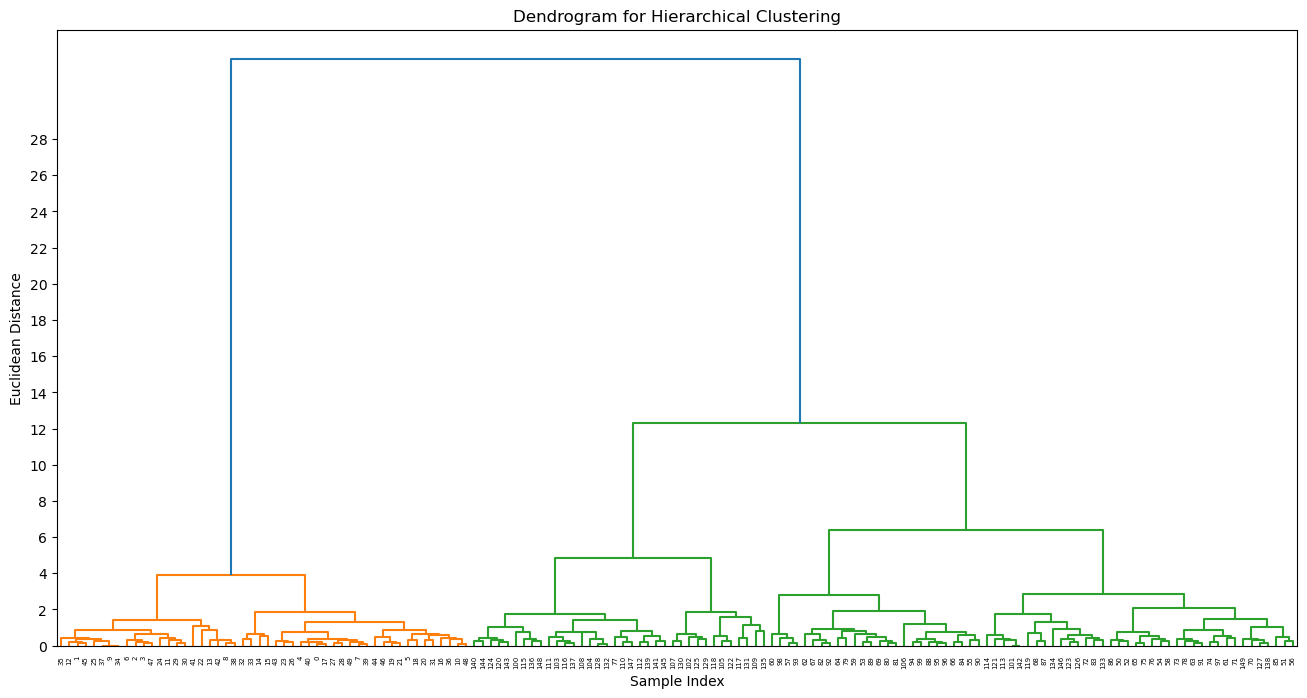

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage


# create dendrogram
# using ward's method for linkage to minimize the variance between clusters

linked=linkage(df1, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(16,8))
dendrogram(linked, orientation='top', distance_sort='desending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.yticks(list(np.arange(0,30,2)))
plt.show()

In [ ]:
# build a dendrogram and add a horizontal line at the level where we determine the number of clusters.
# In this example, the line is drawn  near at y=11.

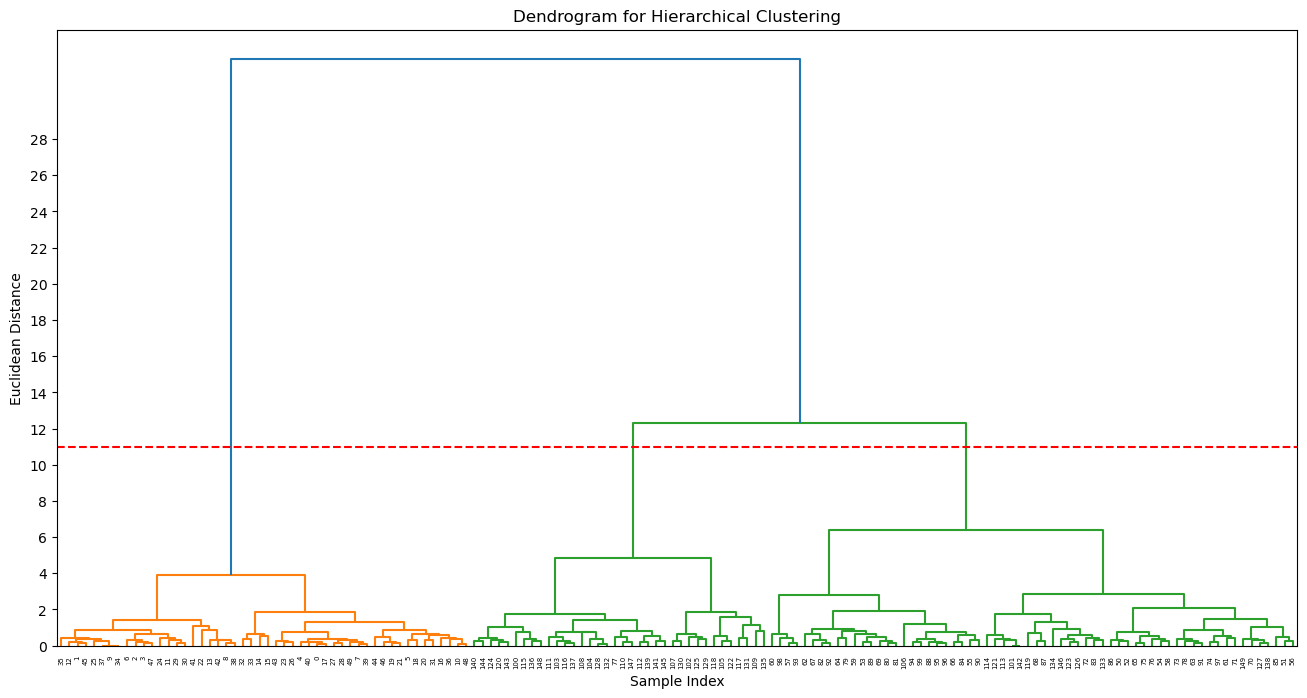

In [21]:
linked=linkage(df1, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(16,8))
dendrogram(linked, orientation='top', distance_sort='desending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.yticks(list(np.arange(0,30,2)))
plt.axhline(y=11, color='r', linestyle='--')
plt.show()


In [ ]:
# number of clusters = 3

In [22]:
from sklearn.cluster import AgglomerativeClustering

# apply hierarchical clustering with 3 clusters

agg_clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agg_clusters=agg_clustering.fit_predict(df[features])

# Cluster analisys
# adding hierarchical cluster label to the original df
df['Cluster_Hierarchical']=agg_clusters
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster_KMeans,Cluster_Hierarchical
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,1


In [23]:
df['Cluster_Hierarchical'].value_counts()

Cluster_Hierarchical
0    64
1    50
2    36
Name: count, dtype: int64

In [26]:
df.query('Cluster_Hierarchical==2') 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster_KMeans,Cluster_Hierarchical
77,78,6.7,3.0,5.0,1.7,Iris-versicolor,2,2
100,101,6.3,3.3,6.0,2.5,Iris-virginica,2,2
102,103,7.1,3.0,5.9,2.1,Iris-virginica,2,2
103,104,6.3,2.9,5.6,1.8,Iris-virginica,2,2
104,105,6.5,3.0,5.8,2.2,Iris-virginica,2,2
105,106,7.6,3.0,6.6,2.1,Iris-virginica,2,2
107,108,7.3,2.9,6.3,1.8,Iris-virginica,2,2
108,109,6.7,2.5,5.8,1.8,Iris-virginica,2,2
109,110,7.2,3.6,6.1,2.5,Iris-virginica,2,2
110,111,6.5,3.2,5.1,2.0,Iris-virginica,2,2


In [ ]:
# 0- Iris-versicolor	 1 -Iris-setosa	 2 - Iris-virginica

### Errors

In [28]:
df['Cluster_Hierarchical'] = df['Cluster_Hierarchical'].replace({1:"Iris-setosa", 2:"Iris-virginica",0: "Iris-versicolor"})
len(df[df.Species != df.Cluster_Hierarchical])

16

In [34]:
df_HC_errors=df[df.Species != df.Cluster_Hierarchical]
df_HC_errors

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster_KMeans,Cluster_Hierarchical
77,78,6.7,3.0,5.0,1.7,Iris-versicolor,Iris-virginica,Iris-virginica
101,102,5.8,2.7,5.1,1.9,Iris-virginica,Iris-versicolor,Iris-versicolor
106,107,4.9,2.5,4.5,1.7,Iris-virginica,Iris-versicolor,Iris-versicolor
113,114,5.7,2.5,5.0,2.0,Iris-virginica,Iris-versicolor,Iris-versicolor
114,115,5.8,2.8,5.1,2.4,Iris-virginica,Iris-versicolor,Iris-versicolor
119,120,6.0,2.2,5.0,1.5,Iris-virginica,Iris-versicolor,Iris-versicolor
121,122,5.6,2.8,4.9,2.0,Iris-virginica,Iris-versicolor,Iris-versicolor
123,124,6.3,2.7,4.9,1.8,Iris-virginica,Iris-versicolor,Iris-versicolor
126,127,6.2,2.8,4.8,1.8,Iris-virginica,Iris-versicolor,Iris-versicolor
127,128,6.1,3.0,4.9,1.8,Iris-virginica,Iris-versicolor,Iris-versicolor


In [30]:
df['Cluster_KMeans'] = df['Cluster_KMeans'].replace({1:"Iris-setosa", 2:"Iris-virginica",0: "Iris-versicolor"})
len(df[df.Species != df.Cluster_KMeans])

16

In [33]:
df_KM_errors=df[df.Species != df.Cluster_KMeans]
df_KM_errors

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster_KMeans,Cluster_Hierarchical
52,53,6.9,3.1,4.9,1.5,Iris-versicolor,Iris-virginica,Iris-versicolor
77,78,6.7,3.0,5.0,1.7,Iris-versicolor,Iris-virginica,Iris-virginica
101,102,5.8,2.7,5.1,1.9,Iris-virginica,Iris-versicolor,Iris-versicolor
106,107,4.9,2.5,4.5,1.7,Iris-virginica,Iris-versicolor,Iris-versicolor
113,114,5.7,2.5,5.0,2.0,Iris-virginica,Iris-versicolor,Iris-versicolor
114,115,5.8,2.8,5.1,2.4,Iris-virginica,Iris-versicolor,Iris-versicolor
119,120,6.0,2.2,5.0,1.5,Iris-virginica,Iris-versicolor,Iris-versicolor
121,122,5.6,2.8,4.9,2.0,Iris-virginica,Iris-versicolor,Iris-versicolor
123,124,6.3,2.7,4.9,1.8,Iris-virginica,Iris-versicolor,Iris-versicolor
126,127,6.2,2.8,4.8,1.8,Iris-virginica,Iris-versicolor,Iris-versicolor


### Results:

In [ ]:
"""
K-Means results:
0 - Iris-versicolor  1- Iris-setosa  2- Iris-virginica 
Cluster_KMeans
0    62
1    50
2    38


According to Hierarchical method:
0- Iris-versicolor	 1 -Iris-setosa	 2 - Iris-virginica
Cluster_Hierarchical
0    64
1    50
2    36

Errors: There are 16 objects which both methods found wrong."""